# 1.usa.gov data from bit.ly

In [1]:
path = 'usagov_bitly_data2012-03-16-1331923249.txt'

In [2]:
with open(path, 'r') as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [3]:
import json

path = 'usagov_bitly_data2012-03-16-1331923249.txt'
with open(path, 'r', encoding='utf-8') as f:
    records = [json.loads(line) for line in f.readlines()]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [4]:
records[0]['tz']

'America/New_York'

# Counting Time Zones in Pure Python

In [14]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [15]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [16]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

## get counts by dict

In [17]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else: counts[x] = 1
    return counts

## default dict

In [18]:
from collections import defaultdict

def get_counts_by_defaultdict(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [19]:
counts = get_counts(time_zones)

In [20]:
counts['America/New_York']

1251

In [21]:
len(time_zones)

3440

In [22]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]


In [23]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [24]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# Counting Time Zones with pandas

In [27]:
from pandas import DataFrame, Series
import pandas as pd

In [28]:
df = DataFrame(records)
df

a   c   nk  \
0     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  1.0   
1                                GoogleMaps/RochesterNY  US  0.0   
2     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...  US  1.0   
3     Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...  BR  0.0   
4     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  0.0   
...                                                 ...  ..  ...   
3555  Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...  US  1.0   
3556  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...  US  0.0   
3557                             GoogleMaps/RochesterNY  US  0.0   
3558                                     GoogleProducer  US  0.0   
3559  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...  US  0.0   

                       tz  gr       g       h             l              al  \
0        America/New_York  MA  A6qOVH  wfLQtf       orofrog  en-US,en;q=0.8   
1          America/Denver  UT  mwszkS  mwszkS         bitly             NaN   
2        America/New_York  DC  xxr3Qb  xxr3Qb         bitly           en-US   
3       America/Sao_Paulo  27  zCaLwp  zUtuOu      alelex88           pt-br   
4        America/New_York  MA  9b6kNl  9b6kNl         bitly  en-US,en;q=0.8   
...                   ...  ..     ...     ...           ...             ...   
3555     America/New_York  NJ  e5SvKE  fqPSr9  tweetdeckapi              en   
3556      America/Chicago  OK  jQLtP4  jQLtP4         bitly  en-US,en;q=0.8   
3557       America/Denver  UT  mwszkS  mwszkS         bitly             NaN   
3558  America/Los_Angeles  CA  zjtI4X  zjtI4X         bitly             NaN   
3559     America/New_York  VA  qxKrTK  qxKrTK         bitly           en-US   

             hh                                                  r  \
0     1.usa.gov  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...   
1          j.mp                           http://www.AwareMap.com/   
2     1.usa.gov                               http://t.co/03elZC4Q   
3     1.usa.gov                                             direct   
4        bit.ly                http://www.shrewsbury-ma.gov/selco/   
...         ...                                                ...   
3555  1.usa.gov                                             direct   
3556  1.usa.gov  http://www.facebook.com/l.php?u=http%3A%2F%2F1...   
3557       j.mp                           http://www.AwareMap.com/   
3558  1.usa.gov                                             direct   
3559  1.usa.gov                               http://t.co/OEEEvwjU   

                                                      u             t  \
0           http://www.ncbi.nlm.nih.gov/pubmed/22415991  1.331923e+09   
1           http://www.monroecounty.gov/etc/911/rss.php  1.331923e+09   
2     http://boxer.senate.gov/en/press/releases/0316...  1.331923e+09   
3               http://apod.nasa.gov/apod/ap120312.html  1.331923e+09   
4     http://www.shrewsbury-ma.gov/egov/gallery/1341...  1.331923e+09   
...                                                 ...           ...   
3555  http://www.fda.gov/AdvisoryCommittees/Committe...  1.331927e+09   
3556  http://www.okc.gov/PublicNotificationSystem/Fo...  1.331927e+09   
3557        http://www.monroecounty.gov/etc/911/rss.php  1.331927e+09   
3558                http://www.ahrq.gov/qual/qitoolkit/  1.331927e+09   
3559  http://herndon-va.gov/Content/public_safety/Pu...  1.331927e+09   

                hc             cy                        ll  _heartbeat_   kw  
0     1.331823e+09        Danvers   [42.576698, -70.954903]          NaN  NaN  
1     1.308262e+09          Provo  [40.218102, -111.613297]          NaN  NaN  
2     1.331920e+09     Washington     [38.9007, -77.043098]          NaN  NaN  
3     1.331923e+09           Braz  [-23.549999, -46.616699]          NaN  NaN  
4     1.273672e+09     Shrewsbury   [42.286499, -71.714699]          NaN  NaN  
...            ...            ...                       ...          ...  ...  
3555  1.30

In [29]:
df['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [30]:
tz_counts = df['tz'].value_counts()

In [31]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [32]:
clean_tz = df['tz'].fillna('Missing')

In [33]:
clean_tz[clean_tz == ''] = 'Unknown'

In [34]:
tz_counts = clean_tz.value_counts()

In [35]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<Axes: >

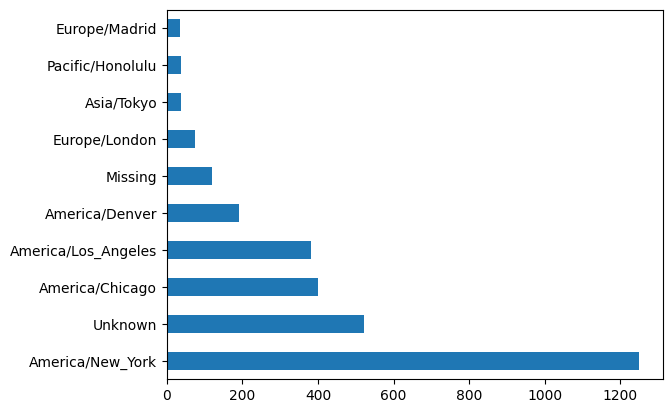

In [37]:
tz_counts[:10].plot(kind='barh', rot=0)

In [38]:
df['a'][1]

'GoogleMaps/RochesterNY'

In [39]:
df['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [40]:
df['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [41]:
results = Series([x.split()[0] for x in df.a.dropna()])

In [42]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [43]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [44]:
clean_df = df[df.a.notnull()]

In [45]:
import numpy as np

In [46]:
operating_system = np.where(clean_df['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [47]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [48]:
by_tz_os = clean_df.groupby(['tz', operating_system])

In [49]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [50]:
agg_counts[:10]

Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0

In [51]:
indexer = agg_counts.sum(1).argsort()

In [52]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [53]:
count_subset = agg_counts.take(indexer)[-10:]

In [54]:
count_subset

Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0

<Axes: ylabel='tz'>

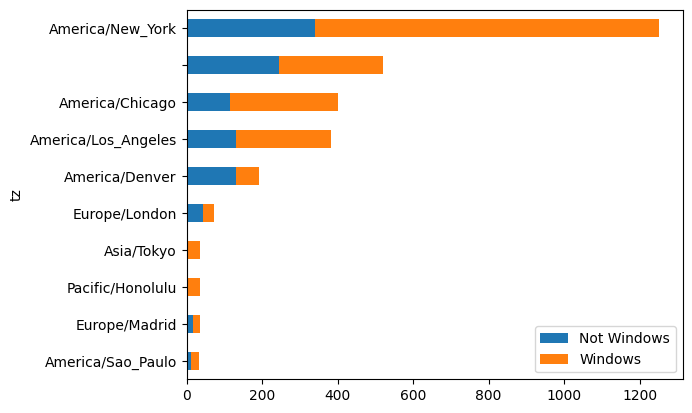

In [55]:
count_subset.plot(kind='barh', stacked=True)

In [56]:
count_subset

Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0

In [57]:
count_subset.sum(1)

tz
America/Sao_Paulo        33.0
Europe/Madrid            35.0
Pacific/Honolulu         36.0
Asia/Tokyo               37.0
Europe/London            74.0
America/Denver          191.0
America/Los_Angeles     382.0
America/Chicago         400.0
                        521.0
America/New_York       1251.0
dtype: float64

In [58]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

In [59]:
normed_subset

Not Windows   Windows
tz                                        
America/Sao_Paulo       0.393939  0.606061
Europe/Madrid           0.457143  0.542857
Pacific/Honolulu        0.000000  1.000000
Asia/Tokyo              0.054054  0.945946
Europe/London           0.581081  0.418919
America/Denver          0.691099  0.308901
America/Los_Angeles     0.340314  0.659686
America/Chicago         0.287500  0.712500
                        0.470250  0.529750
America/New_York        0.270983  0.729017

<Axes: ylabel='tz'>

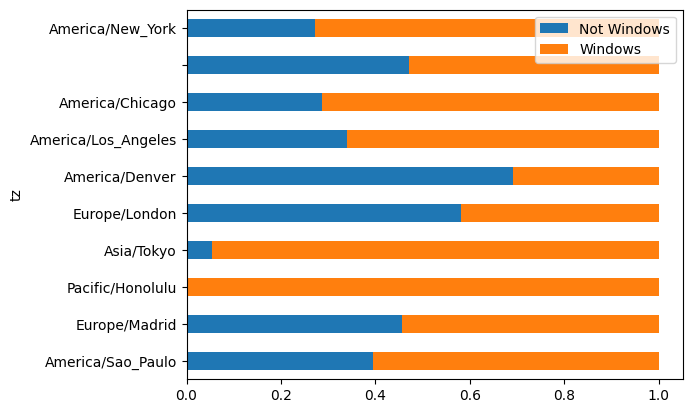

In [60]:
normed_subset.plot(kind='barh', stacked=True)

# MovieLens 1M Data Set

In [61]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [62]:
users[:5]

user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

In [63]:
ratings[:5]

user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [64]:
movies[:5]

movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [65]:
data = pd.merge(pd.merge(ratings, users), movies)

In [66]:
data

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0              1      1193       5  978300760      F    1          10  48067   
1              2      1193       5  978298413      M   56          16  70072   
2             12      1193       4  978220179      M   25          12  32793   
3             15      1193       4  978199279      M   25           7  22903   
4             17      1193       5  978158471      M   50           1  95350   
...          ...       ...     ...        ...    ...  ...         ...    ...   
1000204     5949      2198       5  958846401      M   18          17  47901   
1000205     5675      2703       3  976029116      M   35          14  30030   
1000206     5780      2845       1  958153068      M   18          17  92886   
1000207     5851      3607       5  957756608      F   18          20  55410   
1000208     5938      2909       4  957273353      M   25           1  35401   

                                               title                genres  
0             One Flew Over the Cuckoo's Nest (1975)                 Drama  
1             One Flew Over the Cuckoo's Nest (1975)                 Drama  
2             One Flew Over the Cuckoo's Nest (1975)                 Drama  
3             One Flew Over the Cuckoo's Nest (1975)                 Drama  
4             One Flew Over the Cuckoo's Nest (1975)                 Drama  
...                                              ...                   ...  
1000204                           Modulations (1998)           Documentary  
1000205                        Broken Vessels (1998)                 Drama  
1000206                            White Boys (1999)                 Drama  
1000207                     One Little Indian (1973)  Comedy|Drama|Western  
1000208  Five Wives, Three Secretaries and Me (1998)           Documentary  

[1000209 rows x 10 columns]

In [67]:
# data.ix[0] .ix is deprecated
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [68]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [69]:
mean_ratings[:5]

gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [70]:
ratings_by_title = data.groupby('title').size()

In [71]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [72]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [73]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [74]:
mean_ratings = mean_ratings.loc[active_titles]

In [75]:
mean_ratings

gender                                    F         M
title                                                
'burbs, The (1989)                 2.793478  2.962085
10 Things I Hate About You (1999)  3.646552  3.311966
101 Dalmatians (1961)              3.791444  3.500000
101 Dalmatians (1996)              3.240000  2.911215
12 Angry Men (1957)                4.184397  4.328421
...                                     ...       ...
Young Guns (1988)                  3.371795  3.425620
Young Guns II (1990)               2.934783  2.904025
Young Sherlock Holmes (1985)       3.514706  3.363344
Zero Effect (1998)                 3.864407  3.723140
eXistenZ (1999)                    3.098592  3.289086

[1216 rows x 2 columns]

In [76]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [77]:
top_female_ratings[:10]

gender                                                     F         M
title                                                                 
Close Shave, A (1995)                               4.644444  4.473795
Wrong Trousers, The (1993)                          4.588235  4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650  4.464589
Wallace & Gromit: The Best of Aardman Animation...  4.563107  4.385075
Schindler's List (1993)                             4.562602  4.491415
Shawshank Redemption, The (1994)                    4.539075  4.560625
Grand Day Out, A (1992)                             4.537879  4.293255
To Kill a Mockingbird (1962)                        4.536667  4.372611
Creature Comforts (1990)                            4.513889  4.272277
Usual Suspects, The (1995)                          4.513317  4.518248

# Measuring rating disagreement

In [78]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [79]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [80]:
sorted_by_diff[:15]

gender                                        F         M      diff
title                                                              
Dirty Dancing (1987)                   3.790378  2.959596 -0.830782
Jumpin' Jack Flash (1986)              3.254717  2.578358 -0.676359
Grease (1978)                          3.975265  3.367041 -0.608224
Little Women (1994)                    3.870588  3.321739 -0.548849
Steel Magnolias (1989)                 3.901734  3.365957 -0.535777
Anastasia (1997)                       3.800000  3.281609 -0.518391
Rocky Horror Picture Show, The (1975)  3.673016  3.160131 -0.512885
Color Purple, The (1985)               4.158192  3.659341 -0.498851
Age of Innocence, The (1993)           3.827068  3.339506 -0.487561
Free Willy (1993)                      2.921348  2.438776 -0.482573
French Kiss (1995)                     3.535714  3.056962 -0.478752
Little Shop of Horrors, The (1960)     3.650000  3.179688 -0.470312
Guys and Dolls (1955)                  4.051724  3.583333 -0.468391
Mary Poppins (1964)                    4.197740  3.730594 -0.467147
Patch Adams (1998)                     3.473282  3.008746 -0.464536

In [81]:
sorted_by_diff[::-1][:15]

gender                                         F         M      diff
title                                                               
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300  0.726351
Kentucky Fried Movie, The (1977)        2.878788  3.555147  0.676359
Dumb & Dumber (1994)                    2.697987  3.336595  0.638608
Longest Day, The (1962)                 3.411765  4.031447  0.619682
Cable Guy, The (1996)                   2.250000  2.863787  0.613787
Evil Dead II (Dead By Dawn) (1987)      3.297297  3.909283  0.611985
Hidden, The (1987)                      3.137931  3.745098  0.607167
Rocky III (1982)                        2.361702  2.943503  0.581801
Caddyshack (1980)                       3.396135  3.969737  0.573602
For a Few Dollars More (1965)           3.409091  3.953795  0.544704
Porky's (1981)                          2.296875  2.836364  0.539489
Animal House (1978)                     3.628906  4.167192  0.538286
Exorcist, The (1973)                    3.537634  4.067239  0.529605
Fright Night (1985)                     2.973684  3.500000  0.526316
Barb Wire (1996)                        1.585366  2.100386  0.515020

In [82]:
# 筆者個人較偏好更好理解的寫法, 在這邊沿用sort_values並設定ascending=False
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
sorted_by_diff.sort_values(by='diff', ascending=False)[:15]

gender                                         F         M      diff
title                                                               
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300  0.726351
Kentucky Fried Movie, The (1977)        2.878788  3.555147  0.676359
Dumb & Dumber (1994)                    2.697987  3.336595  0.638608
Longest Day, The (1962)                 3.411765  4.031447  0.619682
Cable Guy, The (1996)                   2.250000  2.863787  0.613787
Evil Dead II (Dead By Dawn) (1987)      3.297297  3.909283  0.611985
Hidden, The (1987)                      3.137931  3.745098  0.607167
Rocky III (1982)                        2.361702  2.943503  0.581801
Caddyshack (1980)                       3.396135  3.969737  0.573602
For a Few Dollars More (1965)           3.409091  3.953795  0.544704
Porky's (1981)                          2.296875  2.836364  0.539489
Animal House (1978)                     3.628906  4.167192  0.538286
Exorcist, The (1973)                    3.537634  4.067239  0.529605
Fright Night (1985)                     2.973684  3.500000  0.526316
Barb Wire (1996)                        1.585366  2.100386  0.515020

In [83]:
rating_std_by_title = data.groupby('title')['rating'].std()

In [84]:
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [85]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# US Baby Names 1880-2010

In [86]:
import pandas as pd
import numpy as np

In [87]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]

In [88]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [89]:
pieces = []
columns = ['name', 'sex', 'births']
for year in range(1880, 2011):
    path = f'names/yob{year}.txt'
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)


In [90]:
names = pd.concat(pieces, ignore_index=True)
names

name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010

[1690784 rows x 4 columns]

In [91]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [92]:
total_births.tail()

sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382

<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

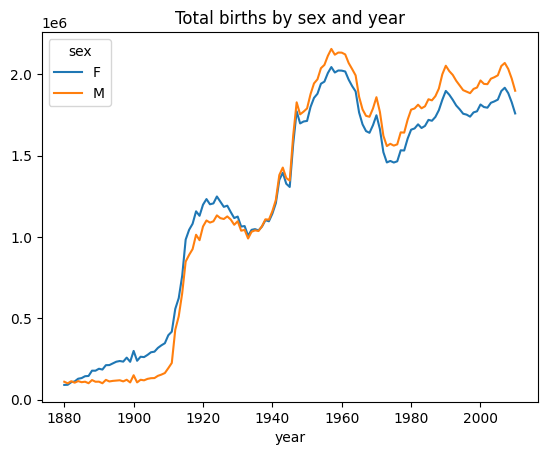

In [93]:
total_births.plot(title='Total births by sex and year')

In [94]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

C:\Users\Ilvme\AppData\Local\Temp\ipykernel_5716\3862268365.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names = names.groupby(['year', 'sex']).apply(add_prop)


In [95]:
names

name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
...            ...  ..     ...   ...       ...
1690779    Zymaire   M       5  2010  0.000003
1690780     Zyonne   M       5  2010  0.000003
1690781  Zyquarius   M       5  2010  0.000003
1690782      Zyran   M       5  2010  0.000003
1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [96]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [97]:
def get_top1000(group):
    # use sort_values instead of sort_index
    return group.sort_values(by='births', ascending=False)[:1000]

In [98]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [99]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)


# Analyzing Naming Trends

In [100]:
boys = top1000[top1000.sex == 'M']

In [101]:
girls = top1000[top1000.sex == 'F']

In [102]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [103]:
total_births

name   Aaden  Aaliyah  Aarav   Aaron  Aarush  Ab  Abagail  Abb  Abbey  Abbie  \
year                                                                           
1880     NaN      NaN    NaN   102.0     NaN NaN      NaN  NaN    NaN   71.0   
1881     NaN      NaN    NaN    94.0     NaN NaN      NaN  NaN    NaN   81.0   
1882     NaN      NaN    NaN    85.0     NaN NaN      NaN  NaN    NaN   80.0   
1883     NaN      NaN    NaN   105.0     NaN NaN      NaN  NaN    NaN   79.0   
1884     NaN      NaN    NaN    97.0     NaN NaN      NaN  NaN    NaN   98.0   
...      ...      ...    ...     ...     ...  ..      ...  ...    ...    ...   
2006     NaN   3737.0    NaN  8279.0     NaN NaN    297.0  NaN  404.0  440.0   
2007     NaN   3941.0    NaN  8914.0     NaN NaN    313.0  NaN  349.0  468.0   
2008   955.0   4028.0  219.0  8511.0     NaN NaN    317.0  NaN  344.0  400.0   
2009  1265.0   4352.0  270.0  7936.0     NaN NaN    296.0  NaN  307.0  369.0   
2010   448.0   4628.0  438.0  7374.0   226.0 NaN    277.0  NaN  295.0  324.0   

name  ...   Zoa     Zoe    Zoey   Zoie  Zola  Zollie  Zona  Zora  Zula   Zuri  
year  ...                                                                      
1880  ...   8.0    23.0     NaN    NaN   7.0     NaN   8.0  28.0  27.0    NaN  
1881  ...   NaN    22.0     NaN    NaN  10.0     NaN   9.0  21.0  27.0    NaN  
1882  ...   8.0    25.0     NaN    NaN   9.0     NaN  17.0  32.0  21.0    NaN  
1883  ...   NaN    23.0     NaN    NaN  10.0     NaN  11.0  35.0  25.0    NaN  
1884  ...  13.0    31.0     NaN    NaN  14.0     6.0   8.0  58.0  27.0    NaN  
...   ...   ...     ...     ...    ...   ...     ...   ...   ...   ...    ...  
2006  ...   NaN  5145.0  2839.0  530.0   NaN     NaN   NaN   NaN   NaN    NaN  
2007  ...   NaN  4925.0  3028.0  526.0   NaN     NaN   NaN   NaN   NaN    NaN  
2008  ...   NaN  4764.0  3438.0  492.0   NaN     NaN   NaN   NaN   NaN    NaN  
2009  ...   NaN  5120.0  3981.0  496.0   NaN     NaN   NaN   NaN   NaN    NaN  
2010  ...   NaN  6200.0  5164.0  504.0   NaN     NaN   NaN   NaN   NaN  258.0  

[131 rows x 6868 columns]

In [104]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

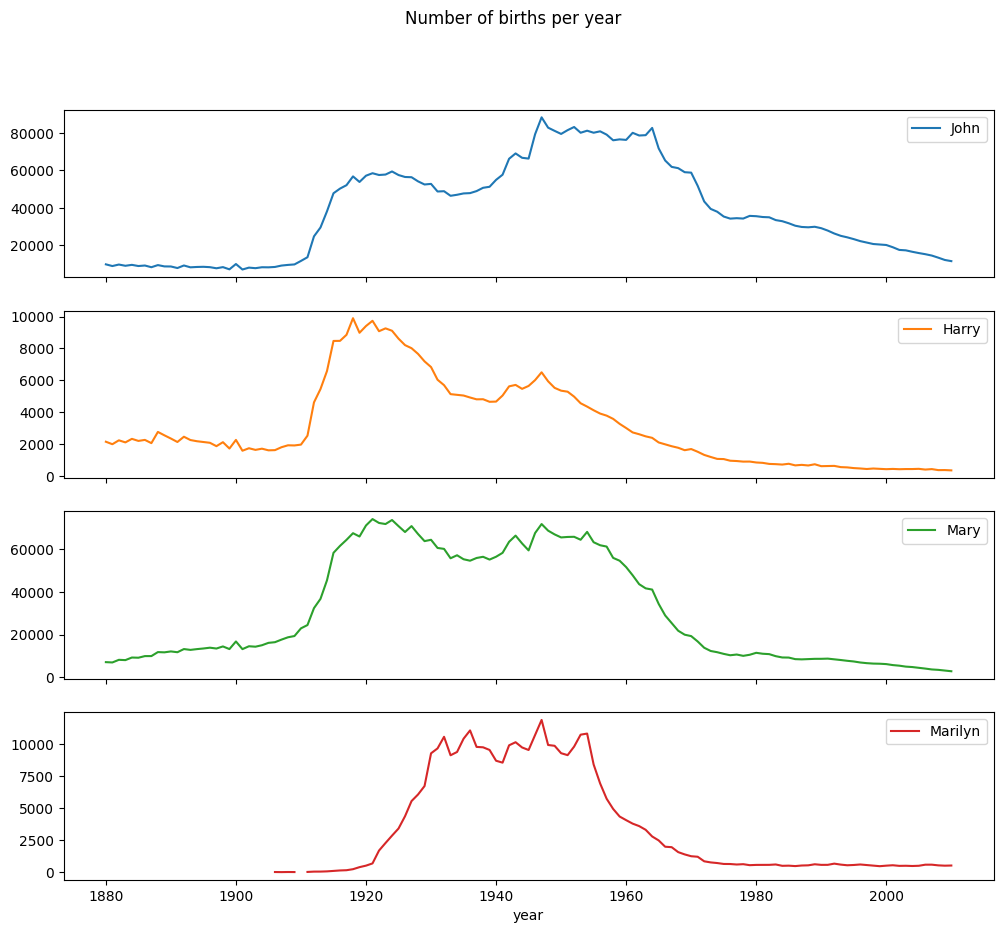

In [105]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

# Measuring the increase in naming diversity

In [106]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

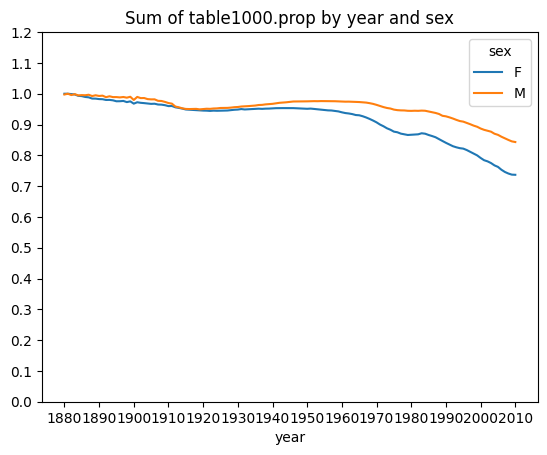

In [107]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [108]:
df_boys_2010 = boys[boys.year == 2010]
df_boys_2010

name sex  births  year      prop
260877    Jacob   M   21875  2010  0.011523
260878    Ethan   M   17866  2010  0.009411
260879  Michael   M   17133  2010  0.009025
260880   Jayden   M   17030  2010  0.008971
260881  William   M   16870  2010  0.008887
...         ...  ..     ...   ...       ...
261872   Camilo   M     194  2010  0.000102
261873   Destin   M     194  2010  0.000102
261874   Jaquan   M     194  2010  0.000102
261875   Jaydan   M     194  2010  0.000102
261876   Maxton   M     193  2010  0.000102

[1000 rows x 5 columns]

In [109]:
prop_cumsum = df_boys_2010.sort_values(by='prop', ascending=False).prop.cumsum()

In [110]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [111]:
prop_cumsum.searchsorted(0.5)

116

In [112]:
df_boys_1900 = boys[boys.year == 1900]
df_boys_1900

name sex  births  year      prop
40877      John   M    9834  1900  0.065319
40878   William   M    8580  1900  0.056990
40879     James   M    7246  1900  0.048129
40880    George   M    5405  1900  0.035901
40881   Charles   M    4102  1900  0.027246
...         ...  ..     ...   ...       ...
41872    Theron   M       8  1900  0.000053
41873   Terrell   M       8  1900  0.000053
41874     Solon   M       8  1900  0.000053
41875  Rayfield   M       8  1900  0.000053
41876  Sinclair   M       8  1900  0.000053

[1000 rows x 5 columns]

In [113]:
in1900 = df_boys_1900.sort_values(by='prop', ascending=False).prop.cumsum()

In [114]:
in1900.searchsorted(0.5) + 1

25

In [115]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [116]:
diversity.head()

sex    F   M
year        
1880  38  14
1881  38  14
1882  38  15
1883  39  15
1884  39  16

<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

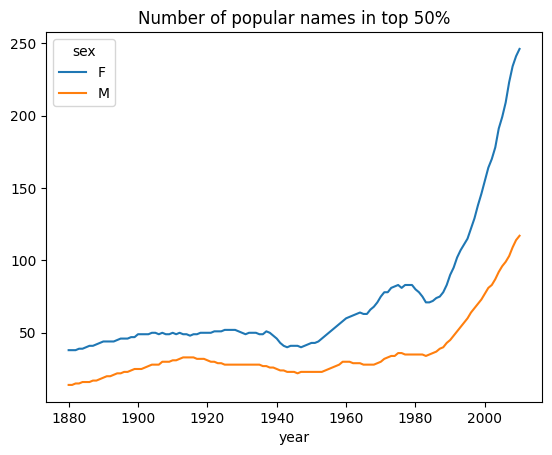

In [117]:
diversity.plot(title='Number of popular names in top 50%')

# The “Last letter” Revolution

In [118]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [119]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [120]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [121]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [122]:
letter_prop = subtable / subtable.sum().astype(float)

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

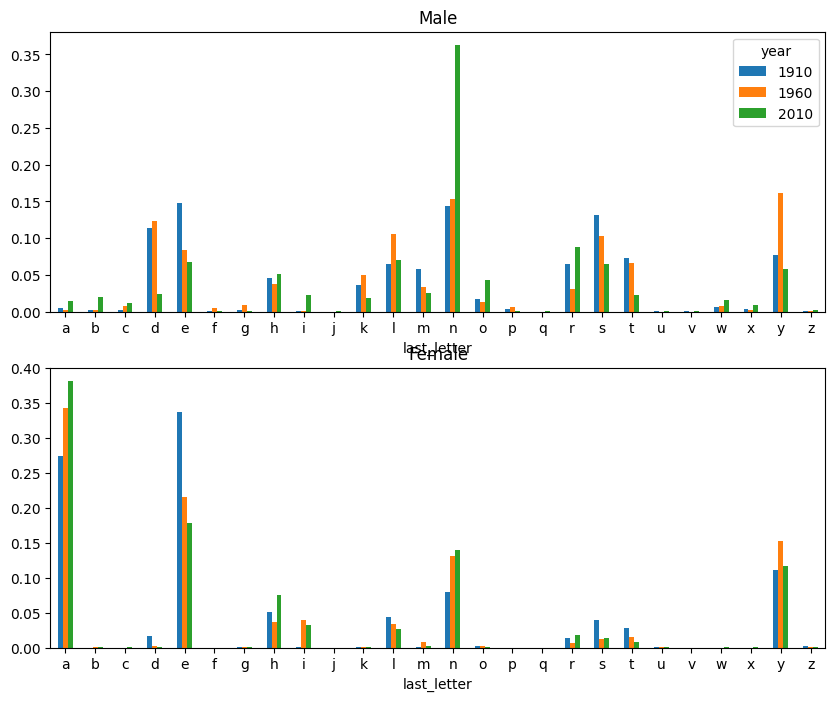

In [123]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
 legend=False)


In [124]:
letter_prop = table / table.sum().astype(float)

In [125]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [126]:
dny_ts.head()

last_letter         d         n         y
year                                     
1880         0.083055  0.153213  0.075760
1881         0.083247  0.153214  0.077451
1882         0.085340  0.149560  0.077537
1883         0.084066  0.151646  0.079144
1884         0.086120  0.149915  0.080405

<Axes: xlabel='year'>

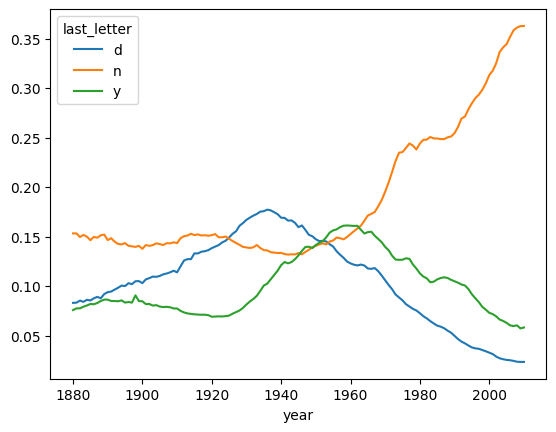

In [127]:
dny_ts.plot()

# Boy names that became girl names (and vice versa)

In [128]:
all_names = top1000.name.unique()

In [129]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [130]:
lesley_like = all_names[mask]

In [131]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [132]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [133]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [134]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [135]:
table = table.div(table.sum(1), axis=0)

In [136]:
table.tail()

sex     F   M
year         
2006  1.0 NaN
2007  1.0 NaN
2008  1.0 NaN
2009  1.0 NaN
2010  1.0 NaN

<Axes: xlabel='year'>

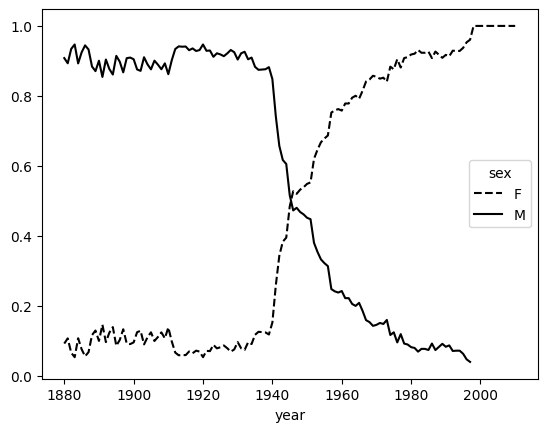

In [137]:
table.plot(style={'M': 'k-', 'F': 'k--'})

# Conclusions and The Path Ahead